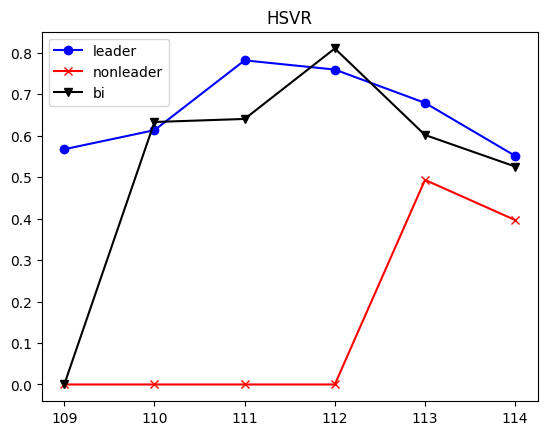

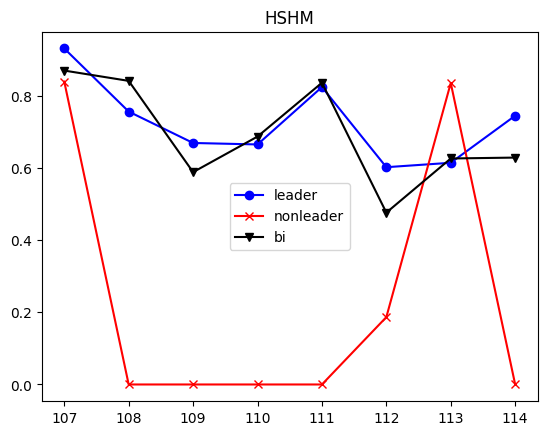

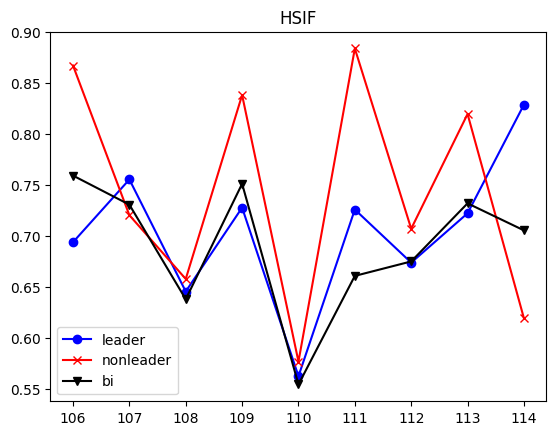

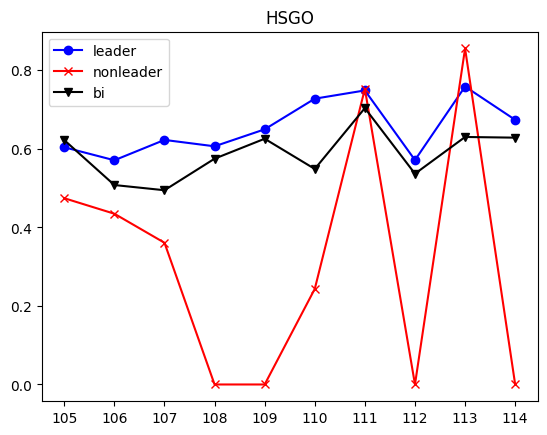

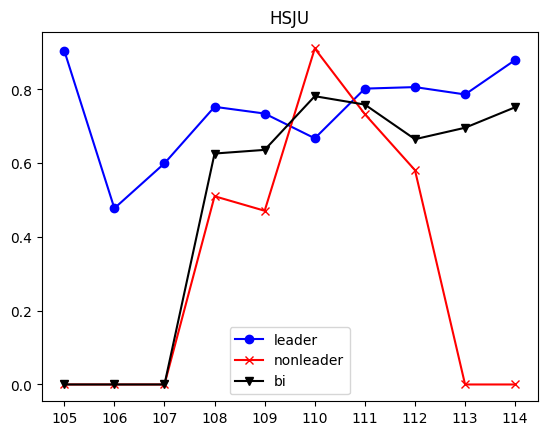

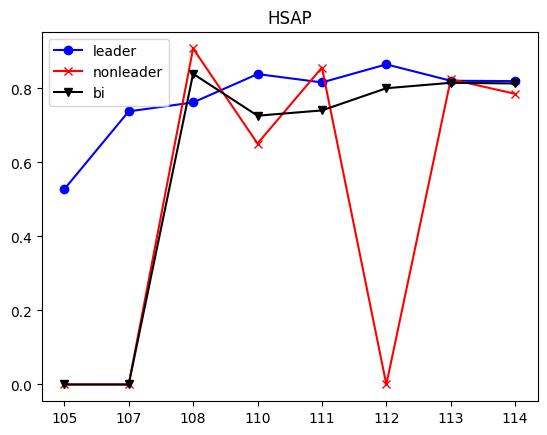

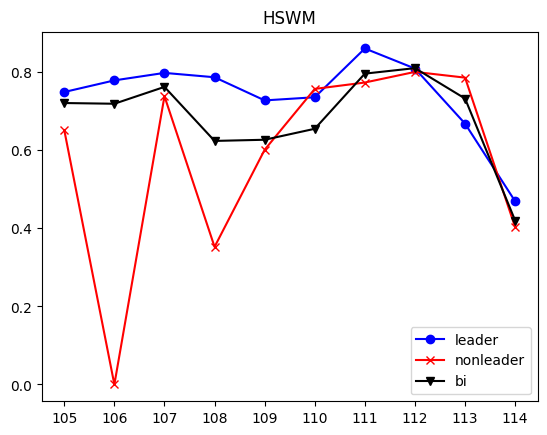

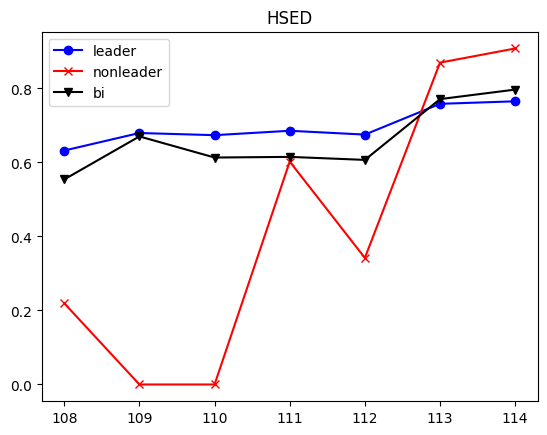

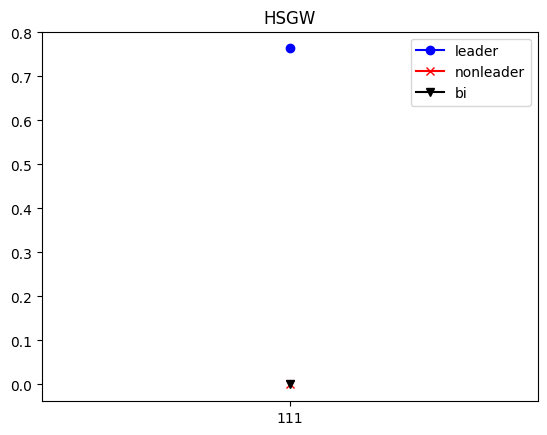

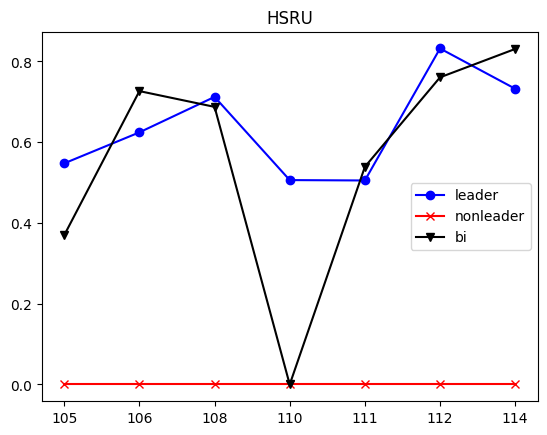

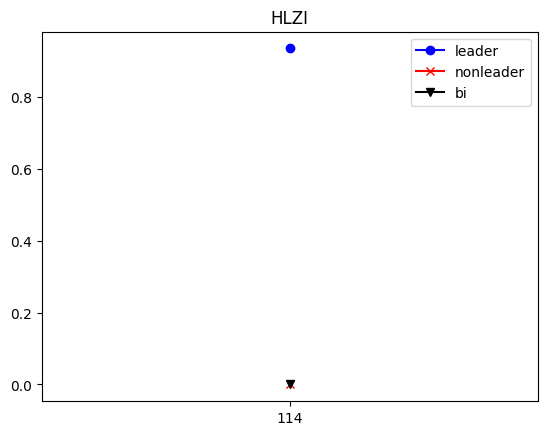

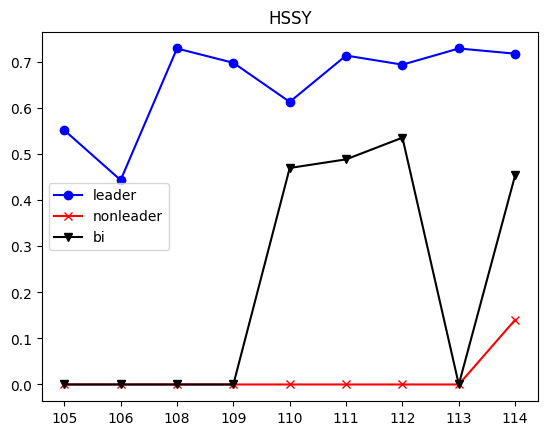

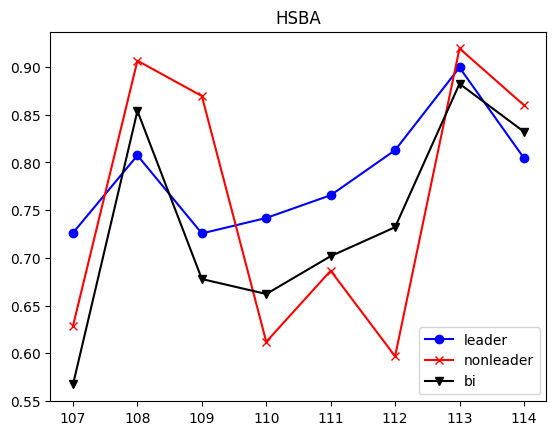

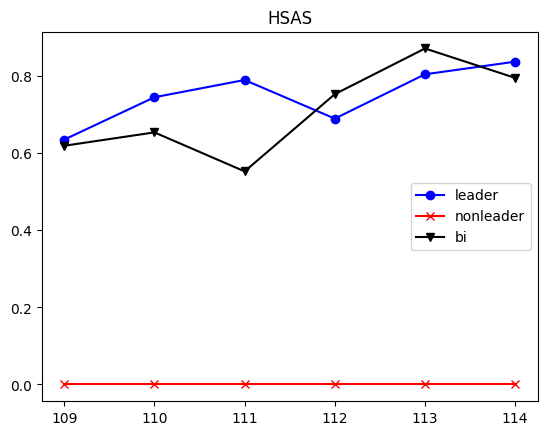

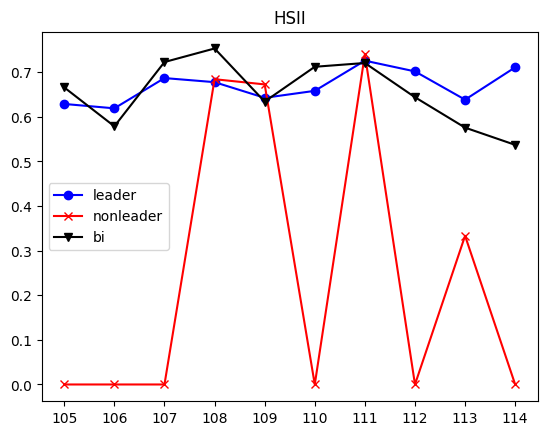

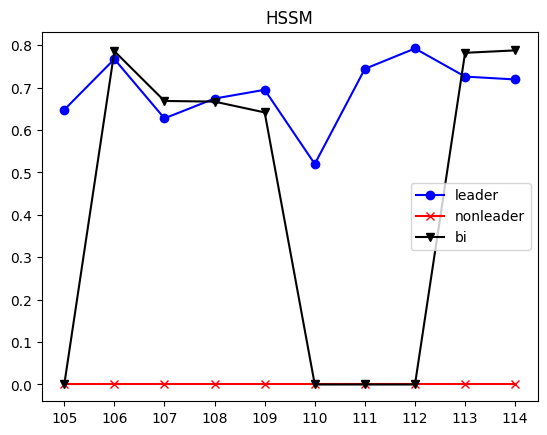

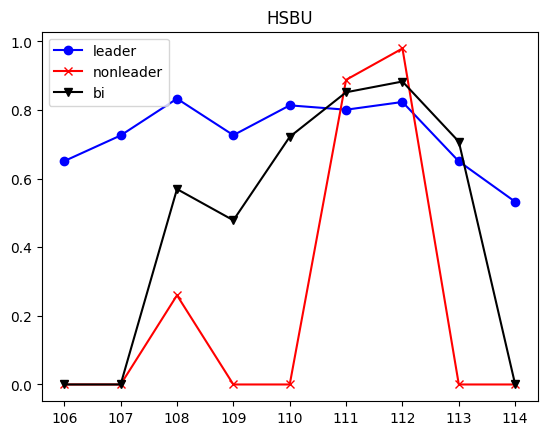

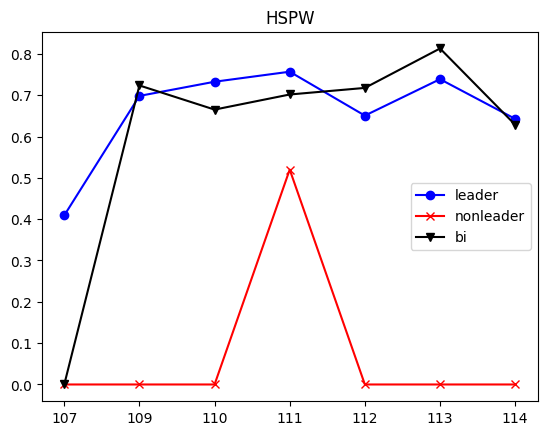

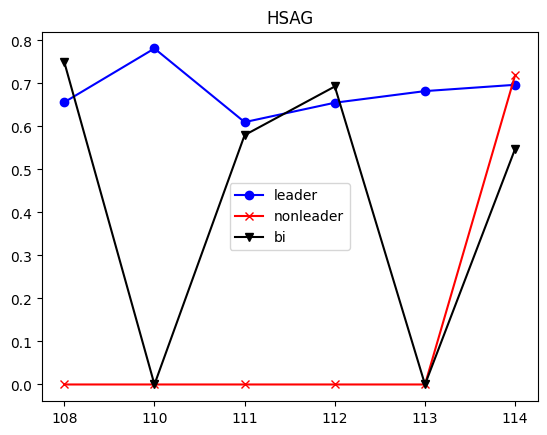

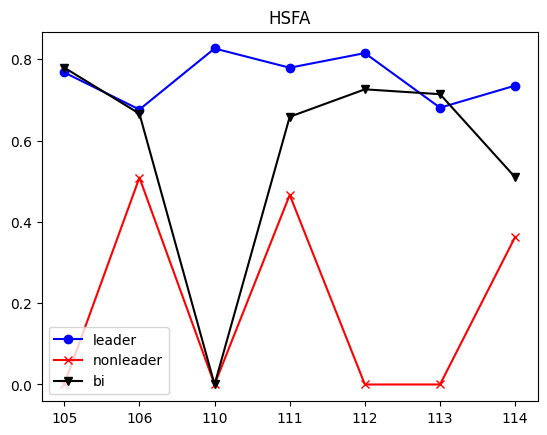

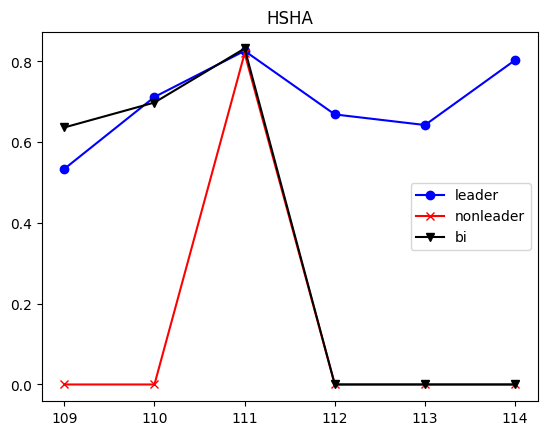

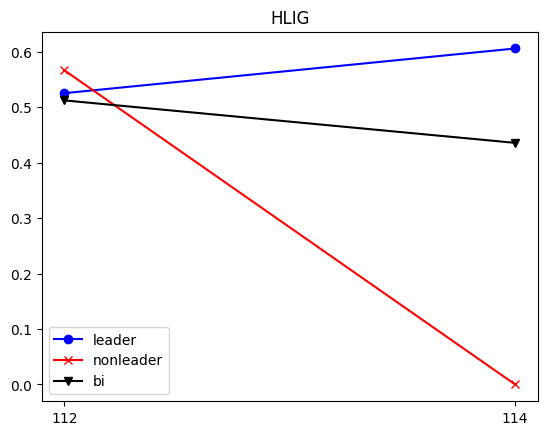

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import os
path = "data/interim/networks"

leader_edge_all = []
nonleader_edge_all = []
bi_edge_all = []

columns = ["congress", "committee", "leader", "nonleader", "bi"]

edge_stats = pd.DataFrame(columns=columns)

for file in os.listdir(path):

    congress = file.split("_")[0]
    committee = file[4:8]

    G = nx.read_graphml(os.path.join(path, file))

    leader_edge = []
    nonleader_edge = []
    bi_edge = []

    for edge in G.edges:
        party_1 = G.nodes[edge[0]]["leader"]
        party_2 = G.nodes[edge[1]]["leader"]

        if party_1 == "0.0" and party_2 == "0.0":
            leader_edge.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            leader_edge_all.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
        elif party_1 == "1.0" and party_2 == "1.0":
            nonleader_edge.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            nonleader_edge_all.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
        else:
            bi_edge.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            bi_edge_all.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            
    
    if len(leader_edge) == 0:
        leader_edge = [0]
    
    if len(nonleader_edge) == 0:
        nonleader_edge = [0]

    if len(bi_edge) == 0:
        bi_edge = [0]

    df = pd.DataFrame(data=[[congress, committee, leader_edge, nonleader_edge, bi_edge]], columns=columns)
    edge_stats = pd.concat([edge_stats, df], ignore_index=True)

edge_stats
for committee in edge_stats["committee"].unique():
    stats = edge_stats[edge_stats["committee"] == committee]

    df = stats.sort_values(by="congress", ascending=True)

    leader_edges = df[df["committee"] == committee]["leader"].apply(np.mean).values.tolist()
    nonleader_edges = df[df["committee"] == committee]["nonleader"].apply(np.mean).values.tolist()
    bi_edges = df[df["committee"] == committee]["bi"].apply(np.mean).values.tolist()
    congresses = df["congress"].values.tolist()

    plt.plot(leader_edges, color = "blue", marker = 'o')
    plt.plot(nonleader_edges, color = "red", marker = 'x')
    plt.plot(bi_edges, color = "black", marker = 'v')
    plt.xticks(range(len(congresses)), congresses)

    plt.title(committee)
    plt.legend(["leader", "nonleader", "bi"])

    plt.show()